# Het misterie van de dood van Heloisa

In het kasteel van barones Heloisa Argentoliensis heeft er zich een drama afgespeeld. Tijdens de nacht van de laatste volle maan werd de barones dood teruggevonden in haar torenkamer. Het overlijden is niet in het minst verdacht te noemen. De barones was nog jong en gezond. Er waren geen indicaties van ziekte. Het plotse overlijden had dus iedereen verrast. Er werd een onderzoek opgestart naar deze mysterieuze moord maar door een gebrek aan bewijs, werd nooit duidelijk wat er echt gebeurd is met barones Heloisa.

Geschiedkundigen vermoeden dat Heloisa vermoord werd door iemand die uit was op haar erfenis. Het testament dat naast haar gevonden werd, is waarschijnlijk geschreven door de dader en niet door Heloise zelf. In dat testament staan vier personen die elk een deel van de erfenis krijgen. In de torenkamer van Heloisa werden verschillende briefwisselingen teruggevonden met elk van deze personen. Deze brieven zullen ons helpen om de dader te identificeren.

Kan jij met behulp van deze notebook achterhalen wie verantwoordelijk is voor de moord van Heloisa?

## Voorkennis

Om met deze notebook aan de slag te gaan, heb je een basiskennis nodig van het Python programmeren. We gebruiken in deze notebook datatypes, operatoren, structuren en functies. Ben je niet zeker dat je voldoende Python kennis hebt voor deze notebook, dan kan je terecht op [dwengo.org/python_programming](https://dwengo.org/python_programming/). Daar worden alle basisprincipes stap voor stap uitgelegd.

## Importeren van de nodige bibliotheken

Voor we starten met ons onderzoek, laden we eerst twee bibliotheken in. Deze bevatten voorgeprogrammeerde functies die we in de analyse nodig zullen hebben.

In [196]:
# Importeer de nodige Python modules
import os
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Het testament

Onderstaande code laadt het testament van Heloise in in Python en drukt het af. Voer de volgende drie cellen uit en lees het testament van Heloise. 

In [197]:
# Deze functie leest de tekst in een bestand en geeft die terug als een string.
def lees_bestand(bestandsnaam):
    with open(bestandsnaam) as f:
        inhoud = f.read()
    return inhoud

In [198]:
# Lees de tekst in het bestand testament.txt en sla het op in de variabele testament.
testament = lees_bestand("documenten/testament.txt")

In [199]:
# Druk de waarde van de variabele testament af.
print(testament)

In naam van de Almachtige God, Amen.

Ik, Heloisa, barones van het illustere huis Abaelardus, in het volledig bewustzijn van mijn vergankelijkheid, stel dit testament op om de wereldse bezittingen te verdelen naar mijn wil en geweten. Moge deze getuigenis de diepste van mijn intenties weerspiegelen, vastberaden en onveranderlijk.

Als eerste daad van mijn nalatenschap verkondig ik dat de helft van mijn vergaarde goudschatten, opgebouwd door de jaren van toewijding, geschonken zal worden aan de heilige kerk, ter bevordering van haar goddelijke missie op aarde, zodat haar werk van mededogen en naastenliefde voort kan blijven bestaan.

Voorts beslis ik dat mijn geliefde oudste zoon Hugo, wiens trouw aan het huis Abaelardus onwrikbaar is gebleken, rechtmatige erfgenaam zal zijn van ons eerbiedwaardige kasteel, waar hij de tradities van onze familie zal voortzetten en onze naam met eer zal dragen.

Aan mijn dierbare dochter Elisabeth, de bron van mijn moederlijke trots, schenk ik het beheer

Lees het testament van Heloise. Wie krijgt welke delen van haar fortuin? Wat is de relatie tussen Heloise en de begunstigden in haar testament?

## Briefwisselingen

Heloise had nauw contact met de vier begunstigden in haar testament. In haar torenkamer werden verschillende brieven teruggevonden van elk van deze personen. Hieronder bekijken we de inhoud van een aantal van die brieven.

De functies in onderstaande cel zullen ons helpen om de teksten uit de verschillende brieven in te lezen in Python.

In [200]:
# Deze functie leest de tekst in alle bestanden in een map en geeft die terug als een string.
def lees_bestanden_in_map(mapnaam):
    bestanden = os.listdir(mapnaam)
    inhoud = []
    for bestand in bestanden:
        if bestand.endswith(".txt"):
            inhoud.append(lees_bestand(mapnaam + "/" + bestand))
    return inhoud

# Deze functie overloopt de mappen met auteurs en leest alle teksten van die auteurs in.
def overloop_mappen_in_map(mapnaam):
    auteurs = {}
    mappen = os.listdir(mapnaam)
    for map in mappen:
        if os.path.isdir(mapnaam + "/" + map):
            auteurs[map] = lees_bestanden_in_map(mapnaam + "/" + map)
    return auteurs

In [201]:
# Lees de tekst voor elke auteurs in de map documenten en sla die op in een dictionary.
teksten_per_auteur = overloop_mappen_in_map("documenten")

Eerst bekijken we van welke auteurs we brieven hebben.

In [202]:
# Druk de namen van de auteurs af.  
print(teksten_per_auteur.keys())

dict_keys(['Elisabeth', 'Gregorius', 'Heloise', 'Hugo', 'Johannes'])


We zien dat we brieven hebben van elke begunstigde in het testament van Heloise.
* Elisabeth: de dochter van Heloise.
* Hugo: de oudste zoon van Heloise.
* Johannes: de jongste zoon van Heloise.
* Gregorius: de kannunik van de lokale kerkgemeenschap.

Laten we nu de inhoud van een aantal van de brieven bekijken.

In [203]:
# Druk de inhoud van de eerste brief van Hugo af.
print(teksten_per_auteur["Hugo"][0])


Lieve moeder,

Hopelijk bereikt brief je in goede gezondheid. Hij komt vanuit strijdtoneel bij Trier, waar zojuist hevige veldslag heeft plaatsgevonden. Het was zware dag, maar wilde je meteen informeren over mijn toestand.

Strijd was intens en vol verrassingen, maar gelukkig ben ik veilig en wel. Met Gods genade en ons familie-erfgoed aan mijn zijde heb ik me door chaos weten te manoeuvreren en onze eer verdedigd. Vijand heeft aanzienlijke verliezen geleden, maar we hebben standgehouden en onze positie behouden.

Ik voel trots over mijn rol in strijd en ik weet dat jij dat ook zult zijn. Ik kijk ernaar uit om je spoedig weer te zien en je persoonlijk verslag te geven van onze heldhaftige daden. Tot tijd bid ik voor jouw veiligheid en welzijn.

Met liefde,

Hugo


In [204]:
# Druk de inhoud van de vijfde brief van Gregorius af.
print(teksten_per_auteur["Gregorius"][4])

Eerbiedwaardige Barones Heloisa Abaelardus,

Het is met oprechte bezorgdheid dat ik u opnieuw benader om het belang van een royale donatie aan de kerk te benadrukken. Als dienaar van de Heilige Kerk voel ik het mijn plicht om u te herinneren aan de zegeningen die voortvloeien uit vrijgevigheid jegens de kerk.

Door uw rijkdommen te delen met de Heilige Kerk, kunt u niet alleen uw eigen zielenheil veiligstellen, maar ook bijdragen aan de voortgang van Gods werk op aarde. Uw vrijgevigheid zal een zegen zijn voor de minderbedeelden en zal de verspreiding van Gods liefde en genade bevorderen.

Ik wil u ook waarschuwen voor de gevaren van het niet doneren aan de kerk. De wereldse rijkdommen die u hier vergaart, zijn vergankelijk en zullen uiteindelijk vergaan. Alleen door uw schatten te investeren in het koninkrijk van God kunt u ware vervulling vinden en uw eeuwige bestemming veiligstellen.

Ik smeek u daarom, eerbiedwaardige Barones, om de voordelen van een royale donatie aan de kerk seri

**Opdracht:** Vul onderstaande code aan zodat je de brieven kan lezen die Elisabeth naar haar moeder schreef.

In [205]:
#print(teksten_per_auteur[___][___])

## Schrijfstijl

Elke persoon heeft een eigen schrijfstijl. Door deze stijl te analyseren, kunnen we achterhalen welke teksten door een en dezelfde auteur geschreven zijn. Deze techniek kunnen we hier ook toepassen. Door de schrijfstijl van het testament te vergelijken met die van de begunstigden in het testament, kunnen we een verdachte voor de moord identificeren.

Hier gebruiken we een eenvoudige techniek om de schrijfstijl van een auteur te bepalen. Dat doen we door te tellen hoe vaak de schrijver bepaalde eenvoudige woorden zoals de, het, u, jij, ... gebruikt in hun tekst. Het aantal keer dat elk van deze woorden voorkomt in een tekst van een auteur noemen we de vingerafdruk van deze auteur.

Om de vingerafdruk van een auteur te kunnen bepalen, moeten we de volgende stappen uitvoeren.

* **Lowercasing**: Alle hoofdletters in de tekst worden vervangen door kleine letters. Lowercasing is nodig omdat we gaan tellen hoeveel keer elk woord voorkomt en we het woord met en zonder hoofdletter op dezelfde manier willen tellen.
* **Tokenisering:**: Alle zinnen worden in betekenisvolle eenheden of 'tokens' gesplitst, zoals woorden en leestekens. Deze splitsing gebeurt op basis van de aanwezige spaties in de zinnen; daarom zullen de woorden van elkaar moeten gescheiden zijn door een spatie.
* **Filteren**: Om een vingerafdruk van de tekst te maken, kijken we enkel naar het gebruik van veelvoorkomende woorden (bv. de, het, u, uw, je, jij, ...). Woorden die niet vaak voorkopen filteren we dus weg uit de tekst.
* **Frequentie analyse**: Hier tellen we hoe vaak deze bepaalde woorden gebruikt. Zo krijgen we een vingerafdruk van de tekst die we kunnen vergelijken met die van andere teksten.
* **Normaliseren**: Om ervoor te zorgen dat we teksten van verschillende lengte met elkaar kunnen vergelijken, normaliseren we de frequentie van elk woord.

## De vingerafdruk van het testament

Eerst bepalen we de vingerafdruk van het testament. Deze vingerafdruk kunnen we dan later vergelijken met die van de teksten van de verschillende auteurs.

### Lowercasing

Hier vervangen we in het testament hoofdletters door kleine letters.

In [206]:
print(testament)
testament = testament.lower()
print(testament)

In naam van de Almachtige God, Amen.

Ik, Heloisa, barones van het illustere huis Abaelardus, in het volledig bewustzijn van mijn vergankelijkheid, stel dit testament op om de wereldse bezittingen te verdelen naar mijn wil en geweten. Moge deze getuigenis de diepste van mijn intenties weerspiegelen, vastberaden en onveranderlijk.

Als eerste daad van mijn nalatenschap verkondig ik dat de helft van mijn vergaarde goudschatten, opgebouwd door de jaren van toewijding, geschonken zal worden aan de heilige kerk, ter bevordering van haar goddelijke missie op aarde, zodat haar werk van mededogen en naastenliefde voort kan blijven bestaan.

Voorts beslis ik dat mijn geliefde oudste zoon Hugo, wiens trouw aan het huis Abaelardus onwrikbaar is gebleken, rechtmatige erfgenaam zal zijn van ons eerbiedwaardige kasteel, waar hij de tradities van onze familie zal voortzetten en onze naam met eer zal dragen.

Aan mijn dierbare dochter Elisabeth, de bron van mijn moederlijke trots, schenk ik het beheer

### Tokenizering

Hier splitsen we de tekst op in afzonderlijke woorden. Daarvoor verwijderen we eerst de leestekens, daarna splisten we de tekst overal waar een spatie staat. Zo krijgen we een lijst van afzonderlijke woorden.

In [207]:
# Eerst verwijderen we de leestekens uit de tekst
def verwijder_leestekens(tekst):
    leestekens = string.punctuation
    tekst_zonder_leestekens = ""
    for karakter in tekst:
        if karakter not in leestekens:
            tekst_zonder_leestekens = tekst_zonder_leestekens + karakter
            
    return tekst_zonder_leestekens

In [208]:
# Verwijder de leestekens en splits de tekst in woorden.
testament = verwijder_leestekens(testament).split()

In [209]:
print(testament)

['in', 'naam', 'van', 'de', 'almachtige', 'god', 'amen', 'ik', 'heloisa', 'barones', 'van', 'het', 'illustere', 'huis', 'abaelardus', 'in', 'het', 'volledig', 'bewustzijn', 'van', 'mijn', 'vergankelijkheid', 'stel', 'dit', 'testament', 'op', 'om', 'de', 'wereldse', 'bezittingen', 'te', 'verdelen', 'naar', 'mijn', 'wil', 'en', 'geweten', 'moge', 'deze', 'getuigenis', 'de', 'diepste', 'van', 'mijn', 'intenties', 'weerspiegelen', 'vastberaden', 'en', 'onveranderlijk', 'als', 'eerste', 'daad', 'van', 'mijn', 'nalatenschap', 'verkondig', 'ik', 'dat', 'de', 'helft', 'van', 'mijn', 'vergaarde', 'goudschatten', 'opgebouwd', 'door', 'de', 'jaren', 'van', 'toewijding', 'geschonken', 'zal', 'worden', 'aan', 'de', 'heilige', 'kerk', 'ter', 'bevordering', 'van', 'haar', 'goddelijke', 'missie', 'op', 'aarde', 'zodat', 'haar', 'werk', 'van', 'mededogen', 'en', 'naastenliefde', 'voort', 'kan', 'blijven', 'bestaan', 'voorts', 'beslis', 'ik', 'dat', 'mijn', 'geliefde', 'oudste', 'zoon', 'hugo', 'wiens',

### Filteren

Om een fingerafdruk van een tekst te maken, gebruiken we enkel een vaste verzameling van veelvoorkomende woorden. In de volgende codecel, filteren we elke tekst en houden we enkel de woorden over die nuttig zijn voor de vingerafdruk.

In [210]:
# Dit is de lijst met woorden die we gaan tellen.
vingerafdruk_woorden = ["de", "het", "een", "en", "in", "op", "van", "voor", "achter", "onder", "boven", "tussen", "tegen", "met", "zonder", "bij", "door", "naar", "uit", "over", "langs", "rond", "om", "naast", "binnen", "buiten", "ik", "jij", "u", "wij", "jullie", "zij", "mijn", "jouw", "uw", "zijn", "haar", "onze", "hun", "die", "dat", "wie", "wat", "welke", "men"]

# Maak een nieuwe lijst met enkel de woorden die in de vingerafdruk kunnen voorkomen.
testament = [woord for woord in testament if woord in vingerafdruk_woorden]

In [211]:
print(testament)

['in', 'van', 'de', 'ik', 'van', 'het', 'in', 'het', 'van', 'mijn', 'op', 'om', 'de', 'naar', 'mijn', 'en', 'de', 'van', 'mijn', 'en', 'van', 'mijn', 'ik', 'dat', 'de', 'van', 'mijn', 'door', 'de', 'van', 'de', 'van', 'haar', 'op', 'haar', 'van', 'en', 'ik', 'dat', 'mijn', 'het', 'zijn', 'van', 'de', 'van', 'onze', 'en', 'onze', 'met', 'mijn', 'de', 'van', 'mijn', 'ik', 'het', 'over', 'onze', 'en', 'zij', 'met', 'en', 'en', 'onze', 'ik', 'mijn', 'de', 'van', 'in', 'het', 'de', 'voor', 'het', 'en', 'de', 'van', 'in', 'die', 'van', 'en', 'onze', 'wat', 'mijn', 'ik', 'dat', 'onder', 'mijn', 'een', 'van', 'mijn', 'en', 'voor', 'ik', 'met', 'mijn', 'en', 'op', 'de', 'van', 'in', 'van', 'die', 'zijn', 'om', 'mijn', 'en', 'mijn']


### Frequentie analyse

Nu we enkel nog woorden over hebben die van belang zijn voor onze vingerafdruk, tellen we hoe vaak elk van deze woorden voorkomt in de tekst.

In [212]:
# Bereken de frequentie van elk woord in het testament.
frequentie_testament = {}
for woord in vingerafdruk_woorden:
    frequentie_testament[woord] = testament.count(woord)

In [213]:
print(frequentie_testament)

{'de': 12, 'het': 6, 'een': 1, 'en': 12, 'in': 5, 'op': 3, 'van': 18, 'voor': 2, 'achter': 0, 'onder': 1, 'boven': 0, 'tussen': 0, 'tegen': 0, 'met': 3, 'zonder': 0, 'bij': 0, 'door': 1, 'naar': 1, 'uit': 0, 'over': 1, 'langs': 0, 'rond': 0, 'om': 2, 'naast': 0, 'binnen': 0, 'buiten': 0, 'ik': 7, 'jij': 0, 'u': 0, 'wij': 0, 'jullie': 0, 'zij': 1, 'mijn': 15, 'jouw': 0, 'uw': 0, 'zijn': 2, 'haar': 2, 'onze': 5, 'hun': 0, 'die': 2, 'dat': 3, 'wie': 0, 'wat': 1, 'welke': 0, 'men': 0}


### Normaliseren

Omdat het aantal woorden dat we tellen afhankelijk is van de lengte van de tekst is het moeilijk om teksten van verschillende lengte te vergelijken. Om toch teksten van verschillende lengte te kunnen vergelijken, kunnen we de frequentie van elk woord normaliseren. Normalisatie is een stap die heel vaak gebruikt wordt in AI systemen en nodig is om inputs op een gelijkaardig "niveau" te brengen. Hier normaliseren we het aantal voorkomens van een woord door het te delen door het totaal aantal woorden dat we geteld hebben.

In [214]:
# Deze functie normaliseert de frequentie van elk woord in een tekst.
def normaliseer(frequentie):
    som = sum(frequentie.values())
    for woord in frequentie:
        if som > 0:
            frequentie[woord] = frequentie[woord] / som
        else:
            frequentie[woord] = 0
    return frequentie

In [215]:
frequentie_testament = normaliseer(frequentie_testament)

In [216]:
print(frequentie_testament)

{'de': 0.11320754716981132, 'het': 0.05660377358490566, 'een': 0.009433962264150943, 'en': 0.11320754716981132, 'in': 0.04716981132075472, 'op': 0.02830188679245283, 'van': 0.16981132075471697, 'voor': 0.018867924528301886, 'achter': 0.0, 'onder': 0.009433962264150943, 'boven': 0.0, 'tussen': 0.0, 'tegen': 0.0, 'met': 0.02830188679245283, 'zonder': 0.0, 'bij': 0.0, 'door': 0.009433962264150943, 'naar': 0.009433962264150943, 'uit': 0.0, 'over': 0.009433962264150943, 'langs': 0.0, 'rond': 0.0, 'om': 0.018867924528301886, 'naast': 0.0, 'binnen': 0.0, 'buiten': 0.0, 'ik': 0.0660377358490566, 'jij': 0.0, 'u': 0.0, 'wij': 0.0, 'jullie': 0.0, 'zij': 0.009433962264150943, 'mijn': 0.14150943396226415, 'jouw': 0.0, 'uw': 0.0, 'zijn': 0.018867924528301886, 'haar': 0.018867924528301886, 'onze': 0.04716981132075472, 'hun': 0.0, 'die': 0.018867924528301886, 'dat': 0.02830188679245283, 'wie': 0.0, 'wat': 0.009433962264150943, 'welke': 0.0, 'men': 0.0}


We kunnen deze frequenties ook weergeven in een grafiek. Zo krijgen we een visuele weergave van onze vingerafdruk.

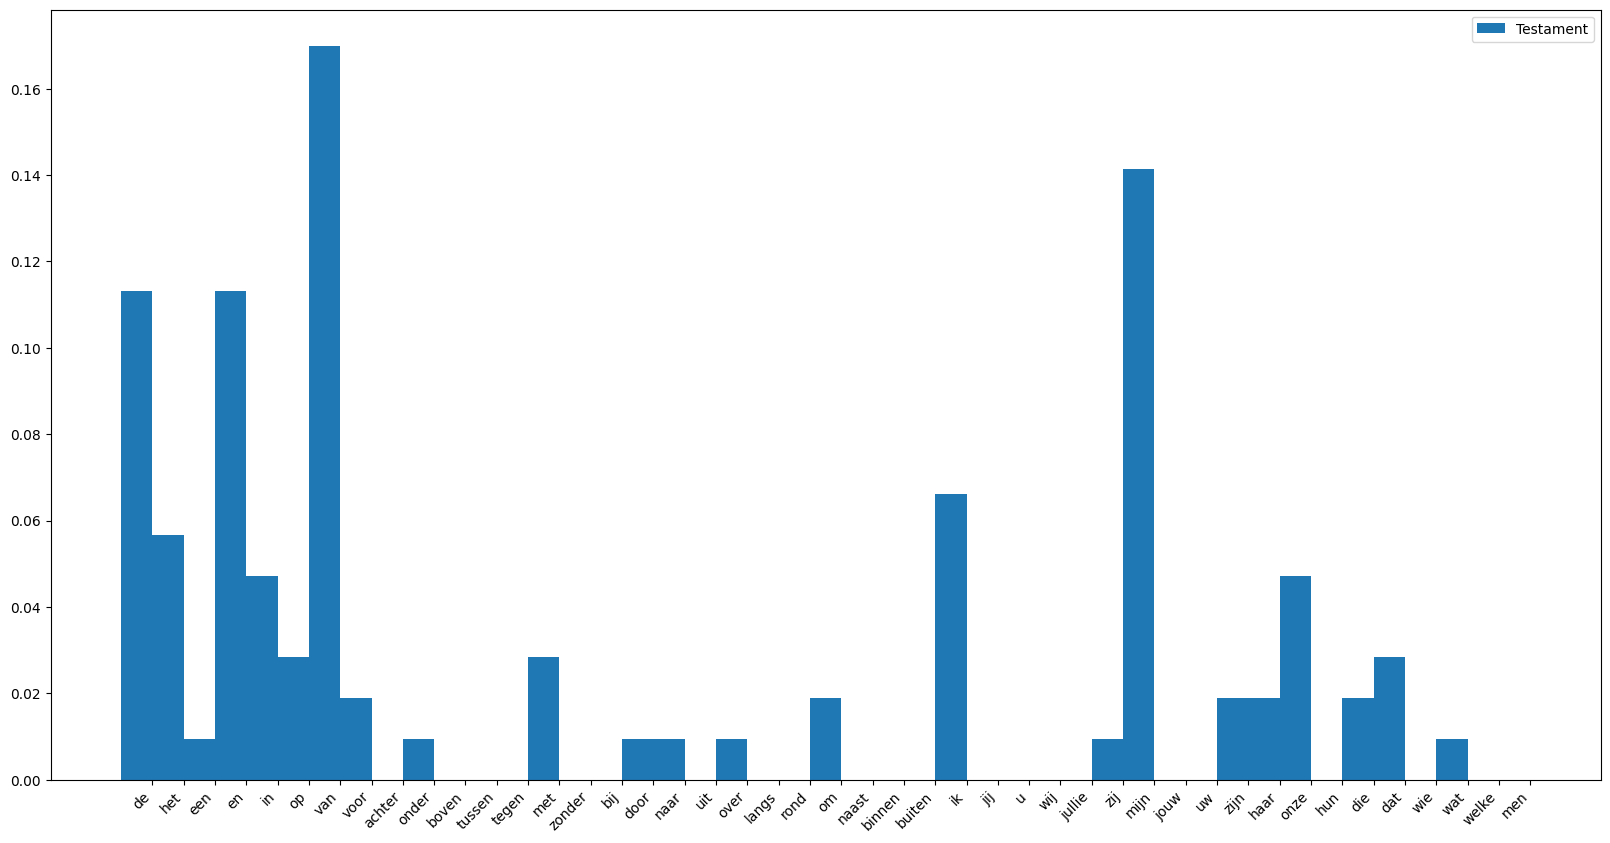

In [217]:
# Maak voor elke auteur en voor het testament een histogram van de frequenties van de woorden.
x = np.arange(len(vingerafdruk_woorden))
breedte = 1

fig, ax = plt.subplots(figsize=(20, 10))
rects_testament = ax.bar(x - breedte/2, list(frequentie_testament.values()), breedte, label='Testament')
ax.set_xticks(x)
ax.set_xticklabels(vingerafdruk_woorden, rotation=45, ha="right")
ax.legend()
plt.show()

## Toepassen op de brieven

We hebben nu alle stappen doorlopen om een vingerafdruk van onze tekst te maken. Deze zelfde stappen kunnen we nu toepassen op de brieven van de kenissen van Heloise. Om dat op een ovezichtelijke manier te doen, schrijven we een functie die de vingerafdruk van een stuk tekst kan bepalen.

In [218]:
def zet_tekst_om_naar_vingerafdruk(tekst):
    tekst = tekst.lower() # Lowercasing
    tekst = verwijder_leestekens(tekst).split() # Verwijder leestekens en splits in woorden
    tekst = [woord for woord in tekst if woord in vingerafdruk_woorden] # Enkel de woorden die in de vingerafdruk kunnen voorkomen
    # Bereken de frequentie van elk woord in de tekst
    frequentie = {}
    for woord in vingerafdruk_woorden:
        frequentie[woord] = tekst.count(woord)
    frequentie = normaliseer(frequentie) # Normaliseer de frequentie
    return frequentie

We maken ook een functie die de vingerafdruk kan visualiseren.

In [219]:
def visualiseer_vingerafdruk(frequentie, titel):
    x = np.arange(len(vingerafdruk_woorden))
    breedte = 1

    fig, ax = plt.subplots(figsize=(20, 10))
    rects = ax.bar(x - breedte/2, list(frequentie.values()), breedte, label=titel)
    ax.set_xticks(x)
    ax.set_xticklabels(vingerafdruk_woorden, rotation=45, ha="right")
    ax.legend()
    ax.title.set_text(titel)
    plt.show()

Hieronder zetten we de eerste brief van Elisabet om naar een vingerafdruk en tonen die op het scherm.

{'de': 0.11864406779661017, 'het': 0.06779661016949153, 'een': 0.03389830508474576, 'en': 0.11864406779661017, 'in': 0.01694915254237288, 'op': 0.01694915254237288, 'van': 0.13559322033898305, 'voor': 0.05084745762711865, 'achter': 0.0, 'onder': 0.0, 'boven': 0.0, 'tussen': 0.0, 'tegen': 0.0, 'met': 0.05084745762711865, 'zonder': 0.0, 'bij': 0.0, 'door': 0.0, 'naar': 0.01694915254237288, 'uit': 0.01694915254237288, 'over': 0.01694915254237288, 'langs': 0.0, 'rond': 0.0, 'om': 0.0, 'naast': 0.0, 'binnen': 0.01694915254237288, 'buiten': 0.01694915254237288, 'ik': 0.03389830508474576, 'jij': 0.0, 'u': 0.03389830508474576, 'wij': 0.0, 'jullie': 0.0, 'zij': 0.0, 'mijn': 0.0, 'jouw': 0.0, 'uw': 0.03389830508474576, 'zijn': 0.01694915254237288, 'haar': 0.0, 'onze': 0.15254237288135594, 'hun': 0.01694915254237288, 'die': 0.0, 'dat': 0.01694915254237288, 'wie': 0.0, 'wat': 0.0, 'welke': 0.0, 'men': 0.0}


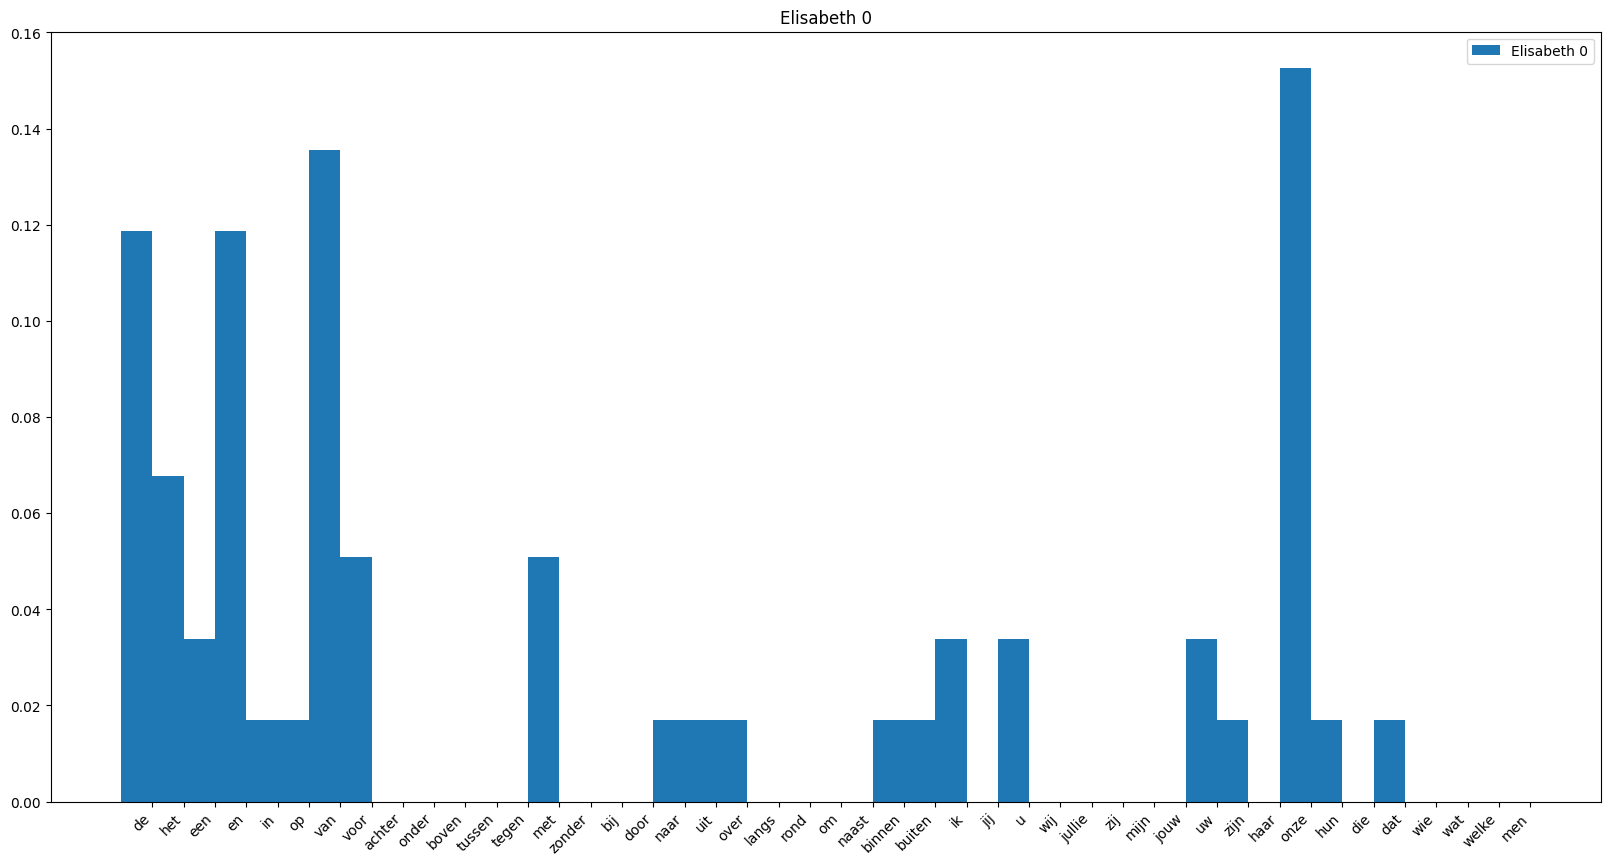

In [220]:
vingerafdruk = zet_tekst_om_naar_vingerafdruk(teksten_per_auteur["Elisabeth"][0])
print(vingerafdruk)
visualiseer_vingerafdruk(vingerafdruk, "Elisabeth 0")

In [221]:
vingerafdruk = zet_tekst_om_naar_vingerafdruk(teksten_per_auteur["Elisabeth"][2])
print(vingerafdruk)
print(frequentie_testament)

{'de': 0.1111111111111111, 'het': 0.09259259259259259, 'een': 0.018518518518518517, 'en': 0.14814814814814814, 'in': 0.018518518518518517, 'op': 0.0, 'van': 0.18518518518518517, 'voor': 0.0, 'achter': 0.018518518518518517, 'onder': 0.018518518518518517, 'boven': 0.0, 'tussen': 0.0, 'tegen': 0.0, 'met': 0.05555555555555555, 'zonder': 0.0, 'bij': 0.0, 'door': 0.018518518518518517, 'naar': 0.0, 'uit': 0.018518518518518517, 'over': 0.018518518518518517, 'langs': 0.0, 'rond': 0.0, 'om': 0.018518518518518517, 'naast': 0.0, 'binnen': 0.0, 'buiten': 0.0, 'ik': 0.05555555555555555, 'jij': 0.0, 'u': 0.018518518518518517, 'wij': 0.0, 'jullie': 0.0, 'zij': 0.0, 'mijn': 0.09259259259259259, 'jouw': 0.0, 'uw': 0.018518518518518517, 'zijn': 0.018518518518518517, 'haar': 0.0, 'onze': 0.018518518518518517, 'hun': 0.0, 'die': 0.037037037037037035, 'dat': 0.0, 'wie': 0.0, 'wat': 0.0, 'welke': 0.0, 'men': 0.0}
{'de': 0.11320754716981132, 'het': 0.05660377358490566, 'een': 0.009433962264150943, 'en': 0.113

**Opdracht:** Pas onderstaande code aan en bekijk zo de vingerafdrukken van de volgende brieven:
* De tweede brief van Hugo.
* De derde brief van Johannes.
* De vijfde brief van Gregorius.

In [222]:
#vingerafdruk = zet_tekst_om_naar_vingerafdruk(teksten_per_auteur[___][___])
#print(vingerafdruk)
#visualiseer_vingerafdruk(vingerafdruk, ___)

## Afstand bepalen

Om te achterhalen welke auteur een stijl heeft die overeenkomt met de stijl in het testament, vergelijken we de vingerafdruk van elke brief met deze van het testament. Dien doen we door de euclidische afstand te berekenen tussen de vingerafdruk van de brief en deze van het testament.

Om de afstand te kunnen bepalen, moeten we eerst elke brief omzetten naar een vingerafdruk. Dat kan je doen met onderstaande code.

In [223]:
# Hier overlopen we alle teksten per auteur en zetten we die om naar vingerafdrukken.
vingerafdrukken = {}
for auteur in teksten_per_auteur:
    vingerafdrukken[auteur] = []
    for i, tekst in enumerate(teksten_per_auteur[auteur]):
        vingerafdrukken[auteur].append(zet_tekst_om_naar_vingerafdruk(tekst))

Nu kunnen we de afstand berekenen tussen de vingerafdruk van elke brief en die van het testament.

In [224]:
# Bereken de afstand tussen elke vingerafdruk en het testament.
afstanden = {}
for auteur in vingerafdrukken:
    afstanden[auteur] = []
    for vingerafdruk in vingerafdrukken[auteur]:
        afstand = 0
        for woord in vingerafdruk:
            afstand += abs(vingerafdruk[woord] - frequentie_testament[woord])
        afstanden[auteur].append(afstand)

In [225]:
# Druk de afstanden af.
for auteur in afstanden:
    print(auteur, afstanden[auteur])

Elisabeth [0.7141029740965783, 0.7970071567989591, 0.4842767295597485, 0.6121593291404611, 0.7111756168359941]
Gregorius [0.8937884248463006, 0.7450636243966651, 0.862533692722372, 0.8328461334041988, 0.8397518738692169]
Heloise [0.8877855014895729, 0.9063109954456733, 1.0377358490566038, 0.85062893081761, 0.9193095142513047]
Hugo [0.9255213505461765, 0.929919137466307, 0.9141509433962265, 0.9908519153802171, 0.8763102725366876]
Johannes [1.0719613865730586, 1.1963284038755737, 1.270237370663421, 1.22533692722372, 0.9850811759543661]


**Opdracht:**: Kan jij uit bovenstaande uitvoer aflezen welke auteur een stijl heeft die het dichtste ligt bij de stijl van het testament?

In [226]:
frequenties = []
labels = []
print(frequentie_testament.values())
frequenties.append(list(frequentie_testament.values()))
labels.append("Testament")
for auteur in vingerafdrukken:
    for frequentie in vingerafdrukken[auteur]:
        frequenties.append(list(frequentie.values()))
        labels.append(auteur)
        
print(frequenties)
print(labels)

dict_values([0.11320754716981132, 0.05660377358490566, 0.009433962264150943, 0.11320754716981132, 0.04716981132075472, 0.02830188679245283, 0.16981132075471697, 0.018867924528301886, 0.0, 0.009433962264150943, 0.0, 0.0, 0.0, 0.02830188679245283, 0.0, 0.0, 0.009433962264150943, 0.009433962264150943, 0.0, 0.009433962264150943, 0.0, 0.0, 0.018867924528301886, 0.0, 0.0, 0.0, 0.0660377358490566, 0.0, 0.0, 0.0, 0.0, 0.009433962264150943, 0.14150943396226415, 0.0, 0.0, 0.018867924528301886, 0.018867924528301886, 0.04716981132075472, 0.0, 0.018867924528301886, 0.02830188679245283, 0.0, 0.009433962264150943, 0.0, 0.0])
[[0.11320754716981132, 0.05660377358490566, 0.009433962264150943, 0.11320754716981132, 0.04716981132075472, 0.02830188679245283, 0.16981132075471697, 0.018867924528301886, 0.0, 0.009433962264150943, 0.0, 0.0, 0.0, 0.02830188679245283, 0.0, 0.0, 0.009433962264150943, 0.009433962264150943, 0.0, 0.009433962264150943, 0.0, 0.0, 0.018867924528301886, 0.0, 0.0, 0.0, 0.0660377358490566,

Tekst: Testament, Cluster: 3
Tekst: Elisabeth, Cluster: 3
Tekst: Elisabeth, Cluster: 3
Tekst: Elisabeth, Cluster: 3
Tekst: Elisabeth, Cluster: 3
Tekst: Elisabeth, Cluster: 3
Tekst: Gregorius, Cluster: 0
Tekst: Gregorius, Cluster: 0
Tekst: Gregorius, Cluster: 0
Tekst: Gregorius, Cluster: 0
Tekst: Gregorius, Cluster: 0
Tekst: Heloise, Cluster: 1
Tekst: Heloise, Cluster: 1
Tekst: Heloise, Cluster: 1
Tekst: Heloise, Cluster: 1
Tekst: Heloise, Cluster: 1
Tekst: Hugo, Cluster: 2
Tekst: Hugo, Cluster: 2
Tekst: Hugo, Cluster: 2
Tekst: Hugo, Cluster: 2
Tekst: Hugo, Cluster: 2
Tekst: Johannes, Cluster: 4
Tekst: Johannes, Cluster: 4
Tekst: Johannes, Cluster: 4
Tekst: Johannes, Cluster: 4
Tekst: Johannes, Cluster: 4


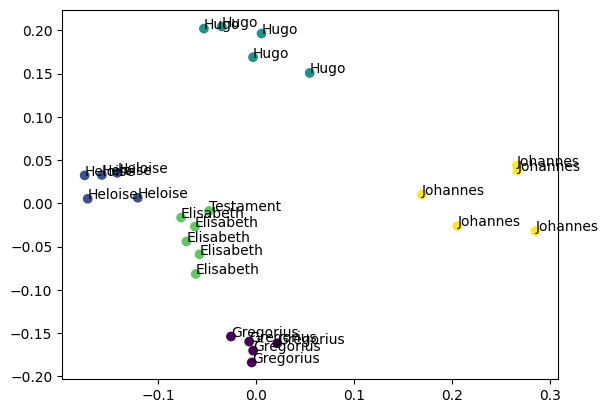

In [227]:
# Cluster de verschillende teksten van de auteurs en het testament.
kmeans = KMeans(n_clusters=5)
kmeans.fit(frequenties)

# Druk de clusters af.
for i, label in enumerate(labels):
    print(f'Tekst: {label}, Cluster: {kmeans.labels_[i]}')

# Druk de clusters af in een scatterplot.   
pca = PCA(n_components=2)
pca.fit(frequenties)
frequenties_pca = pca.transform(frequenties)

plt.scatter(frequenties_pca[:, 0], frequenties_pca[:, 1], c=kmeans.labels_)
for i, label in enumerate(labels):
    plt.text(frequenties_pca[i, 0], frequenties_pca[i, 1], label)
plt.show()




Uit bovenstaande resultaten kunnen we opmaken dat de schrijfstijl van het testament het meeste lijkt op die van Elisabeth. We kunnen deze resultaten ook visualiseren op en 2D grafiek door PCA (Principle Component Analyse) toe te passen op de frequentietabel voor elke auteur. De vingerafdruk van een auteur stellen we momenteel voor door een lijst van getallen. Elk getal geeft weer hoe vaak een woord voorkomt in de tekst.